# Multi Linear Regressor

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [160]:
data = pd.read_csv('austin_final1.csv')

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1319 non-null   int64  
 1   Unnamed: 0.1               1319 non-null   int64  
 2   TempHighF                  1319 non-null   int64  
 3   TempAvgF                   1319 non-null   int64  
 4   TempLowF                   1319 non-null   int64  
 5   DewPointHighF              1319 non-null   float64
 6   DewPointAvgF               1319 non-null   float64
 7   DewPointLowF               1319 non-null   float64
 8   HumidityHighPercent        1319 non-null   float64
 9   HumidityAvgPercent         1319 non-null   float64
 10  HumidityLowPercent         1319 non-null   float64
 11  SeaLevelPressureAvgInches  1319 non-null   float64
 12  VisibilityHighMiles        1319 non-null   float64
 13  VisibilityAvgMiles         1319 non-null   float

In [162]:
data['TempHighF'] = data['TempHighF'].astype(float)

In [163]:
x = data.drop('PrecipitationSumInches' , axis = 1).values
y = data['PrecipitationSumInches'].values

In [164]:
#y = y.reshape(len(y),1)

In [165]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y, test_size = 0.3 , random_state = 0)

In [166]:
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train,Y_train)

LinearRegression()

In [167]:
y_pred = lnr.predict(X_test)
print(y_pred)

[-3.36011645e-02  5.63684827e-01 -1.21932051e-01 -9.91651286e-02
 -1.10125725e-02  4.56316590e-01  3.42803127e-01  2.22666070e-01
  6.67907730e-02  3.34263797e-01  7.41417615e-03  7.33512299e-03
 -1.29625154e-01  4.58092025e-01 -2.97388805e-02  9.03849298e-02
  4.66126755e-01 -1.01604578e-01 -1.46145479e-01 -8.89925366e-02
  1.08731402e-01  1.30699054e-01  7.00880517e-01 -1.12181129e-01
  5.05272262e-02 -3.87627537e-02 -1.38293493e-01  3.07848724e-01
  4.39409356e-01  8.58753977e-01 -5.82055747e-02 -1.43163340e-01
  3.63805955e-01 -2.17817553e-01 -1.72451860e-02  3.07770473e-01
 -8.94890678e-02  7.68429777e-02 -1.52846794e-01  3.21753708e-01
  6.45003690e-01 -3.90659140e-02 -7.67730163e-02  3.76337883e-01
 -1.07723064e-01 -6.45111403e-02  1.41360094e-01  5.39269726e-01
  6.57808023e-02  5.52872931e-01  4.06849121e-02 -6.61708567e-02
  1.02970232e-01 -2.07867312e-02  5.26707282e-01  4.16638855e-01
 -6.95185439e-02 -3.07169647e-02  6.18976909e-02 -8.26271229e-02
 -5.51222554e-02  8.06066

In [168]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

df.head()

,Actual,Predicted
0,0.00,-0.033601
1,0.31,0.563685
2,0.00,-0.121932
3,0.00,-0.099165
4,0.00,-0.011013


In [169]:
import scipy.stats as st
import sklearn.metrics as sm
print("Accuracy of the model =",lnr.score(X_train, Y_train))
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, y_pred),2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(Y_test, y_pred), 2))

Accuracy of the model = 0.3150895890070975
Mean absolute error = 0.2
Mean squared error = 0.19
Median absolute error = 0.09
Explain variance score = 0.28
R2 score = 0.28


Text(0.5, 1.0, 'Actual vs predicated')

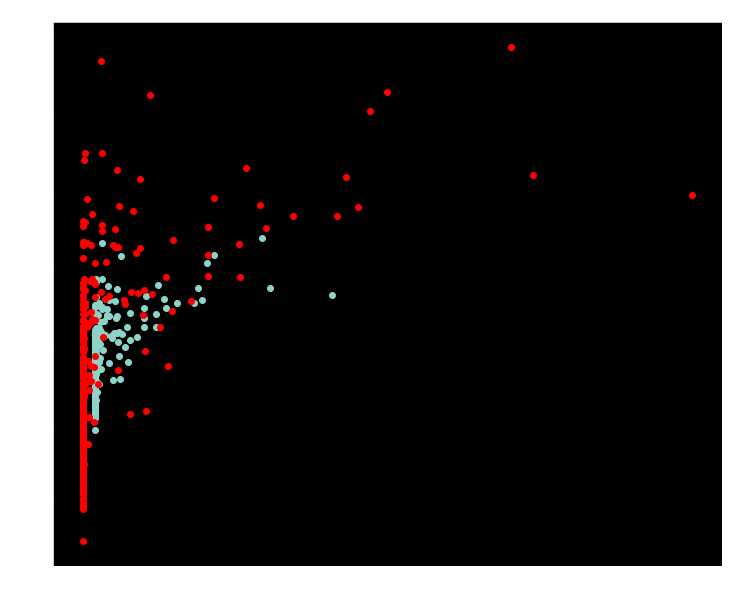

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10)) 
plt.scatter(sc_y.inverse_transform(Y_test),sc_y.inverse_transform(y_pred))
plt.plot(Y_test,y_pred,'ro')#actual data
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicated')